In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random



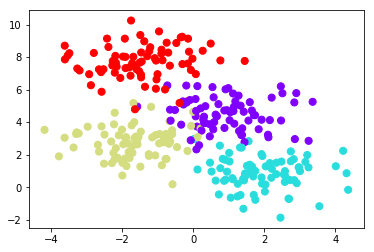

In [5]:
from sklearn.datasets import make_blobs
#create random dataset 
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

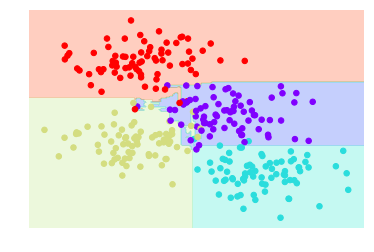

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

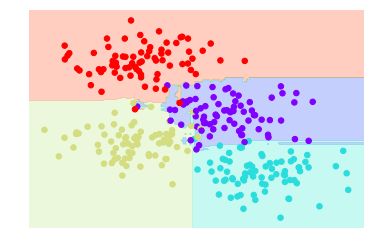

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

# Lets try Random Forests with Image data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

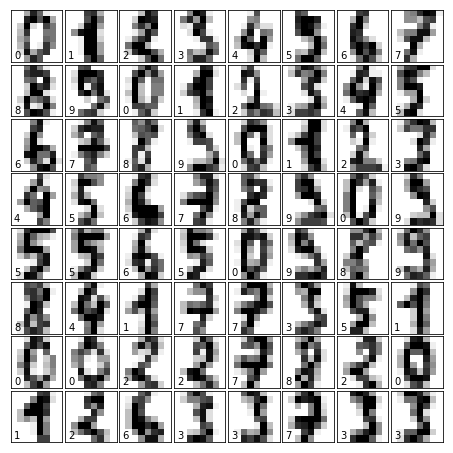

In [10]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [11]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))


             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



# Boosting
Another method used instead of bagging is boosting.


In [2]:
#Build a simple data set with y = x + random
nPoints = 1000
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#print(xPlot)
#x needs to be list of lists.
x = [[s] for s in xPlot]
print(x)
#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]
#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]
#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]



[[-0.5], [-0.499], [-0.498], [-0.497], [-0.496], [-0.495], [-0.494], [-0.493], [-0.492], [-0.491], [-0.49], [-0.489], [-0.488], [-0.487], [-0.486], [-0.485], [-0.484], [-0.483], [-0.482], [-0.481], [-0.48], [-0.479], [-0.478], [-0.477], [-0.476], [-0.475], [-0.474], [-0.473], [-0.472], [-0.471], [-0.47], [-0.469], [-0.46799999999999997], [-0.46699999999999997], [-0.46599999999999997], [-0.46499999999999997], [-0.464], [-0.463], [-0.462], [-0.461], [-0.46], [-0.459], [-0.458], [-0.457], [-0.456], [-0.455], [-0.454], [-0.453], [-0.452], [-0.451], [-0.45], [-0.449], [-0.448], [-0.447], [-0.446], [-0.445], [-0.444], [-0.443], [-0.442], [-0.441], [-0.44], [-0.439], [-0.438], [-0.437], [-0.436], [-0.435], [-0.434], [-0.433], [-0.432], [-0.431], [-0.43], [-0.429], [-0.428], [-0.427], [-0.426], [-0.425], [-0.424], [-0.423], [-0.422], [-0.421], [-0.42], [-0.419], [-0.418], [-0.417], [-0.416], [-0.415], [-0.41400000000000003], [-0.41300000000000003], [-0.41200000000000003], [-0.41100000000000003

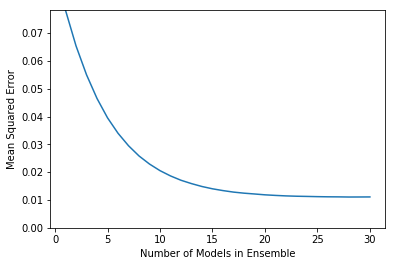

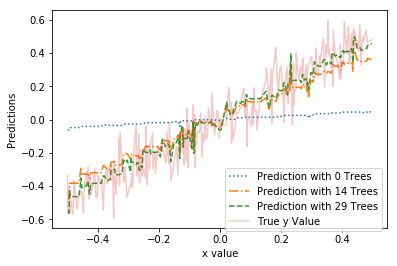

In [3]:
#maximum number of models to generate
numTreesMax = 30
#tree depth - typically at the high end
treeDepth = 5
#initialize a list to hold models
modelList = []
predList = []
eps = 0.1 # gradient descent step size controller
#initialize residuals to be the labels y
residuals = list(yTrain)
for iTrees in range(numTreesMax):
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals) # here residuals = yTrain
    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)
    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]
    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))
    #build cumulative prediction from first "n" models
    mse = []
    allPredictions = []
    for iModels in range(len(modelList)):
        #add the first "iModels" of the predictions and multiply by eps
        prediction = []
        for iPred in range(len(xTest)):
            prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)
        allPredictions.append(prediction)
        errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
        mse.append(sum([e * e for e in errors]) / len(yTest))
      
nModels = [i + 1 for i in range(len(modelList))]
plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()
plotList = [0, 14, 29]
lineType = [':', '-.', '--']
plot.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = 'Prediction with ' + str(iPlot) + ' Trees'
    plot.plot(xTest, allPredictions[iPlot], label = textLegend,
        linestyle = lineType[i])
plot.plot(xTest, yTest, label='True y Value', alpha=0.25)
plot.legend(bbox_to_anchor=(1,0.3))
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()